# Project
- This dataset is part of an active competition until March 31, 2022!

- As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

- This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. Please choose just one of these potential targets for your minimum viable project.

# Business Problem
- Stakeholder:
    - Public health organizations or healthcare providers aiming to increase vaccine uptake for H1N1 and seasonal flu to reduce the spread and impact of these illnesses.
- Business Problem
    - Predict whether individuals are likely to get vaccinated for H1N1 and seasonal flu based on demographic, social, and behavioral factors. Insights from the model can guide targeted vaccination campaigns and policy decisions.

# Data understanding
- Dataset overview:
    - Two target variables: H1N1_vaccine and seasonal_vaccine (binary: 1 for vaccinated, 0 otherwise).
    - Predictors include demographic (age, gender), social (education, marital status), and behavioral (health conditions, vaccine awareness) features.
- Objective:
    - This is a classification problem, where the task is to predict binary outcomes (vaccinated or not).

In [167]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
df = pd.read_csv("C:/Users/DELL/Desktop/Projects/FLU VACCINES/Data/H1N1_Flu_Vaccines.csv")


In [169]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Descriptive Statistics

In [170]:
df.shape

(26707, 38)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [172]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


# Exploratory Data Analysis
- Steps:
    - Load and inspect data:
        - check for missing values
        - understand the distribution of target variables and predictors.
    - Visualize relationships
    - Handle missing values
    - Feature engineering:
        - Encode categorical variables
        - Scale numeric features
    - check class imbalance


In [173]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

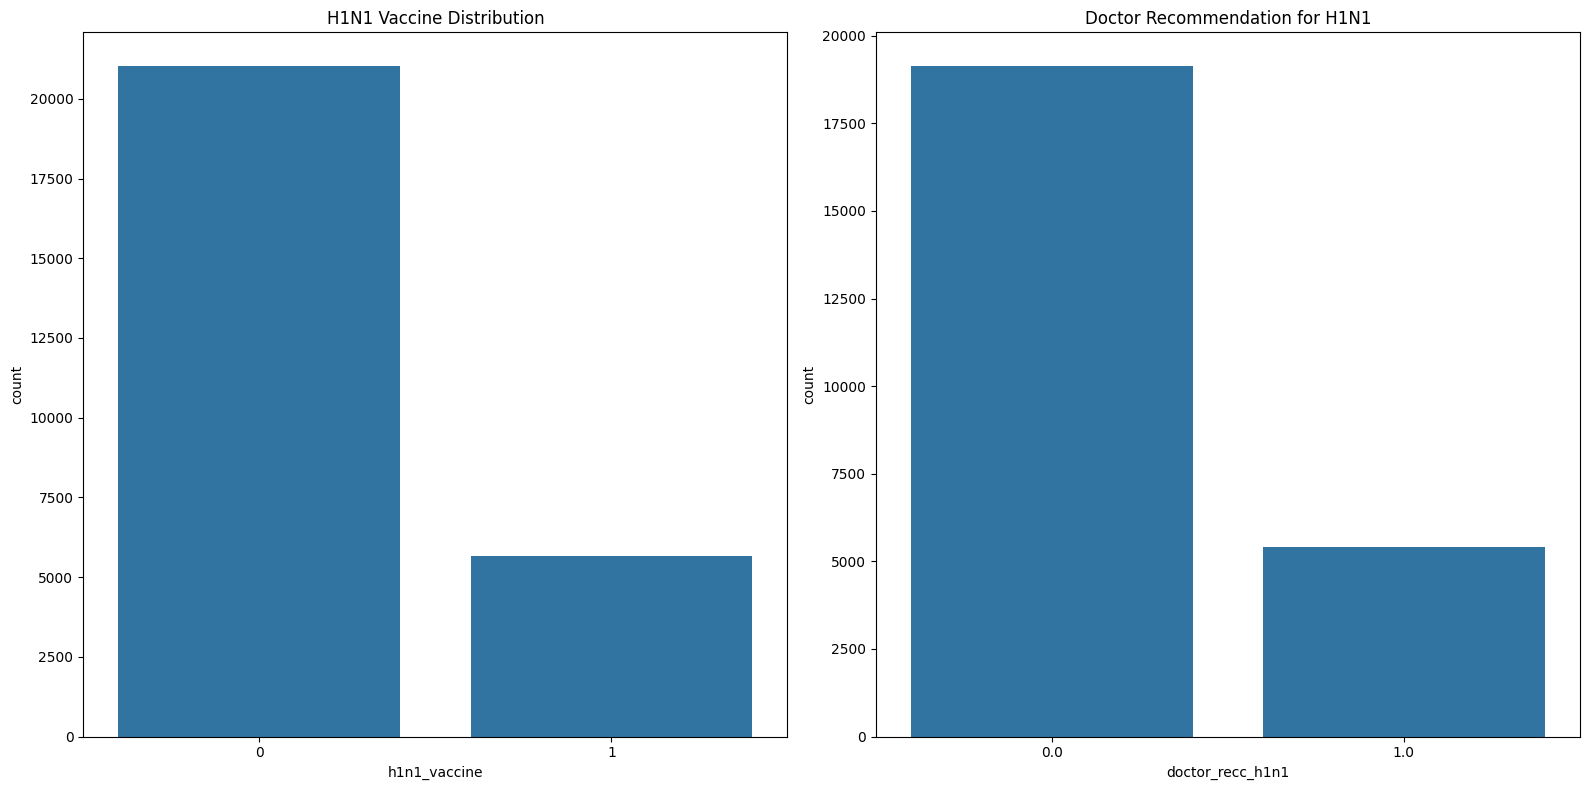

In [174]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First plot: h1n1_vaccine
sns.countplot(x="h1n1_vaccine", data=df, ax=axes[0])
axes[0].set_title("H1N1 Vaccine Distribution")

# Second plot: doctor_recc_h1n1
sns.countplot(x="doctor_recc_h1n1", data=df, ax=axes[1])
axes[1].set_title("Doctor Recommendation for H1N1")

# Display the plots
plt.tight_layout()
plt.show()


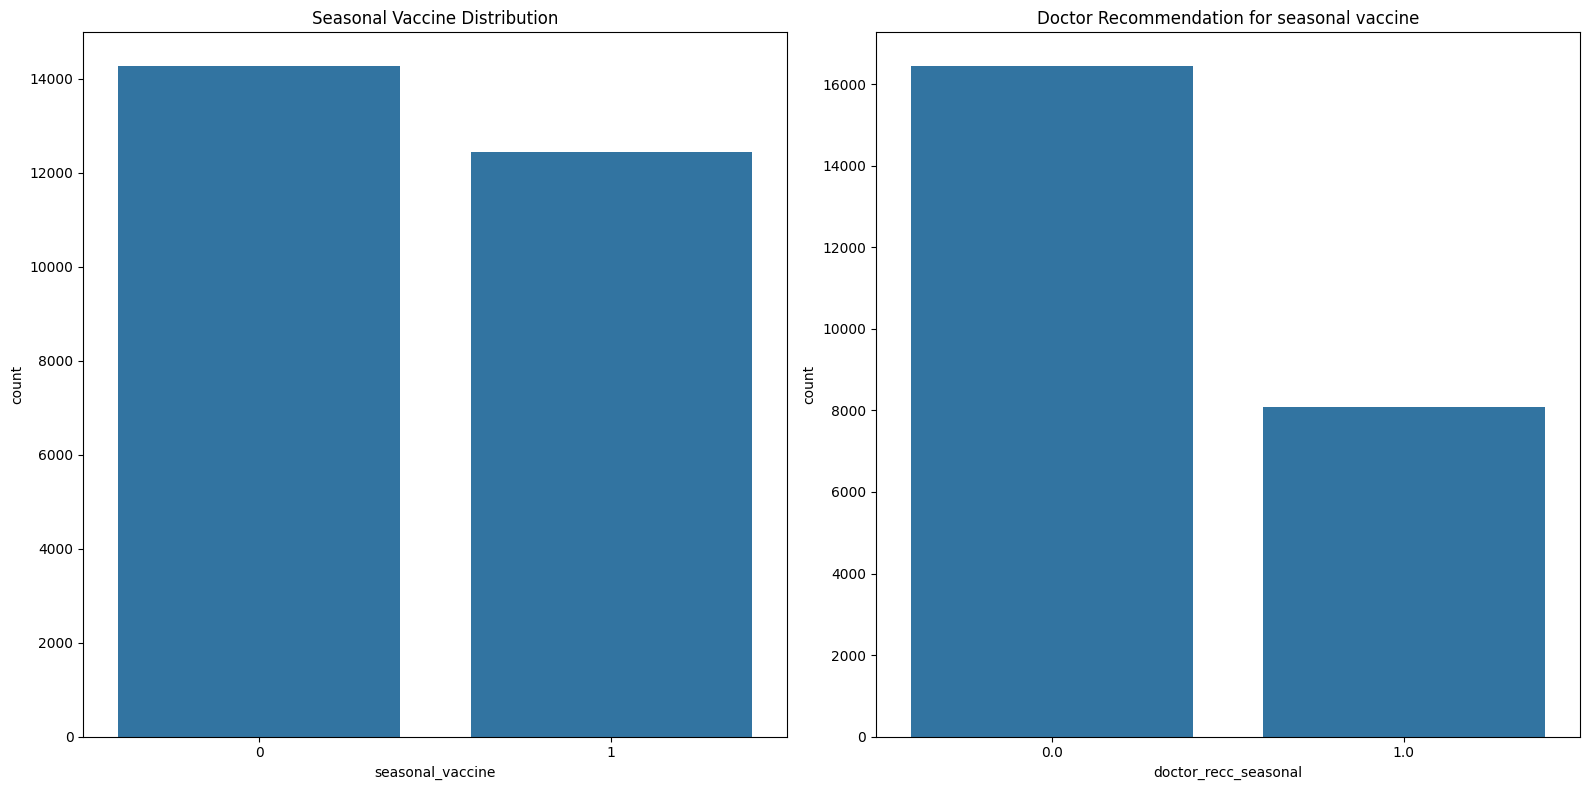

In [175]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First plot: h1n1_vaccine
sns.countplot(x="seasonal_vaccine", data=df, ax=axes[0])
axes[0].set_title("Seasonal Vaccine Distribution")

# Second plot: doctor_recc_seasonal
sns.countplot(x="doctor_recc_seasonal", data=df, ax=axes[1])
axes[1].set_title("Doctor Recommendation for seasonal vaccine")

# Display the plots
plt.tight_layout()
plt.show()


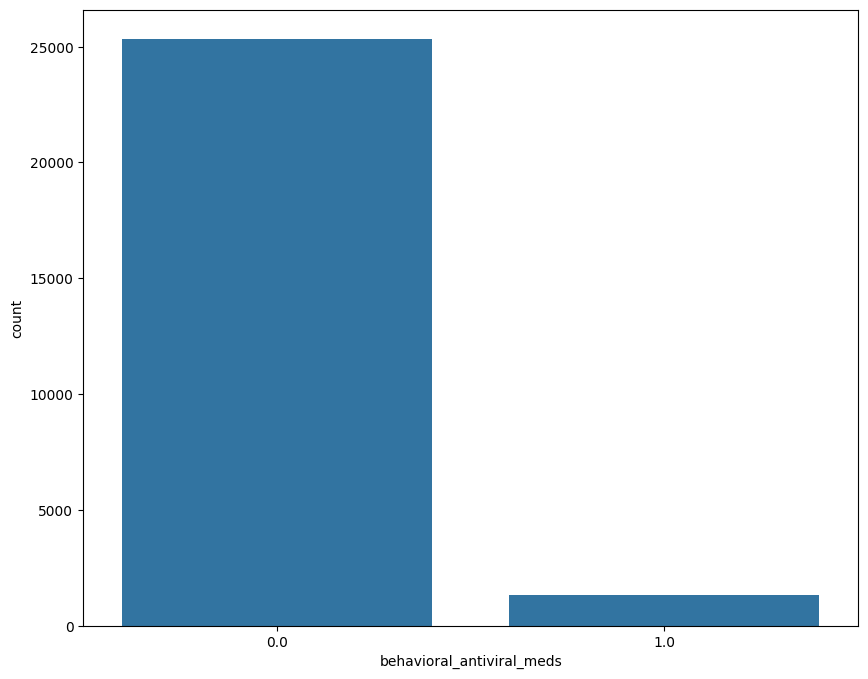

In [176]:
plt.figure(figsize=(10,8))
sns.countplot(x="behavioral_antiviral_meds",data=df)
plt.show()

# Dropping data with more than 30% missing data

In [177]:
# Calculate the percentage of null values per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 30].index

# Drop those columns from the DataFrame
df = df.drop(columns=columns_to_drop)

(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern                    0.344479
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiv

# Mode Imputation for categorical variables

In [178]:
from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputer for categorical columns (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])


# Median imputer for numerical data

In [179]:
from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Imputer for numerical columns (median)
median_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = median_imputer.fit_transform(df[numerical_cols])

# Check if there are any remaining missing values
remaining_missing = df.isnull().sum()
remaining_missing[remaining_missing > 0]


Series([], dtype: int64)

In [180]:
df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

# EDA after cleaning data

In [181]:
df.shape

(26707, 35)

In [182]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,3.852810,2.337589,2.352380,4.025536,2.705321,2.115737,0.887558,0.529599,0.212454,0.465608
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.000195,1.276825,1.353339,1.077131,1.375216,1.319585,0.749980,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_15176\584491901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="race",data=df,palette="BrBG")


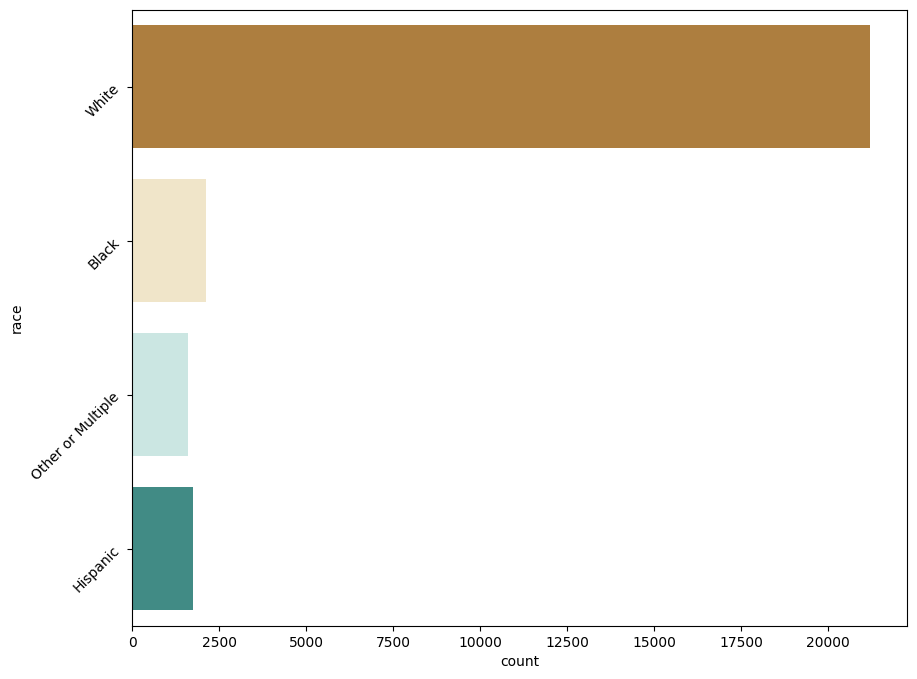

In [183]:
plt.figure(figsize=(10,8))
sns.countplot(y="race",data=df,palette="BrBG")
plt.yticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15176\2993517352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="sex",data=df,palette="BrBG")


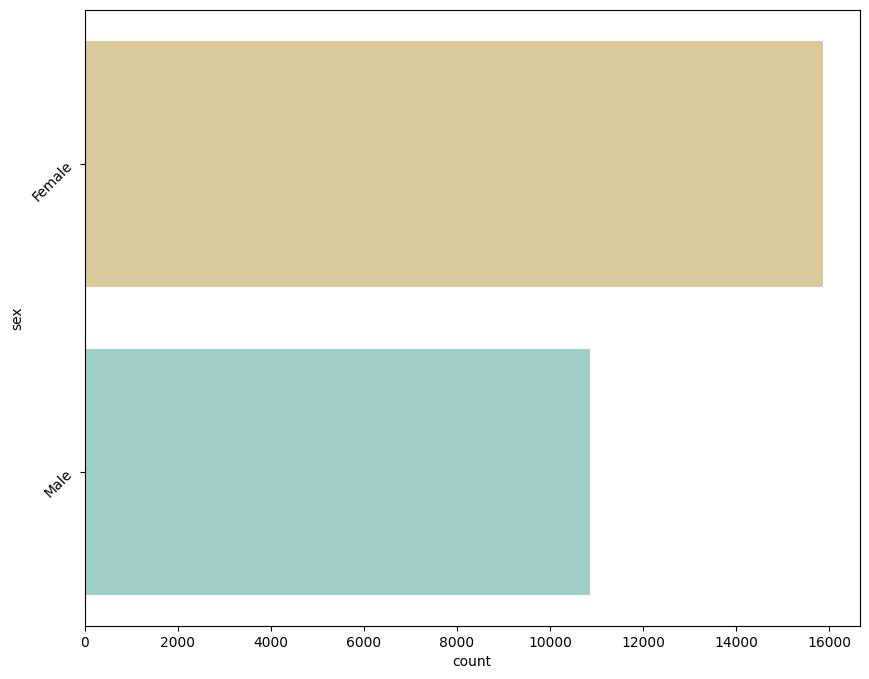

In [184]:
plt.figure(figsize=(10,8))
sns.countplot(y="sex",data=df,palette="BrBG")
plt.yticks(rotation=45)
plt.show()

In [185]:
df["income_poverty"].value_counts()

income_poverty
<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [186]:
df["marital_status"].value_counts()

marital_status
Married        14963
Not Married    11744
Name: count, dtype: int64

In [187]:
df["rent_or_own"].value_counts()

rent_or_own
Own     20778
Rent     5929
Name: count, dtype: int64

In [188]:
df["employment_status"].value_counts()

employment_status
Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [189]:
df["census_msa"].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

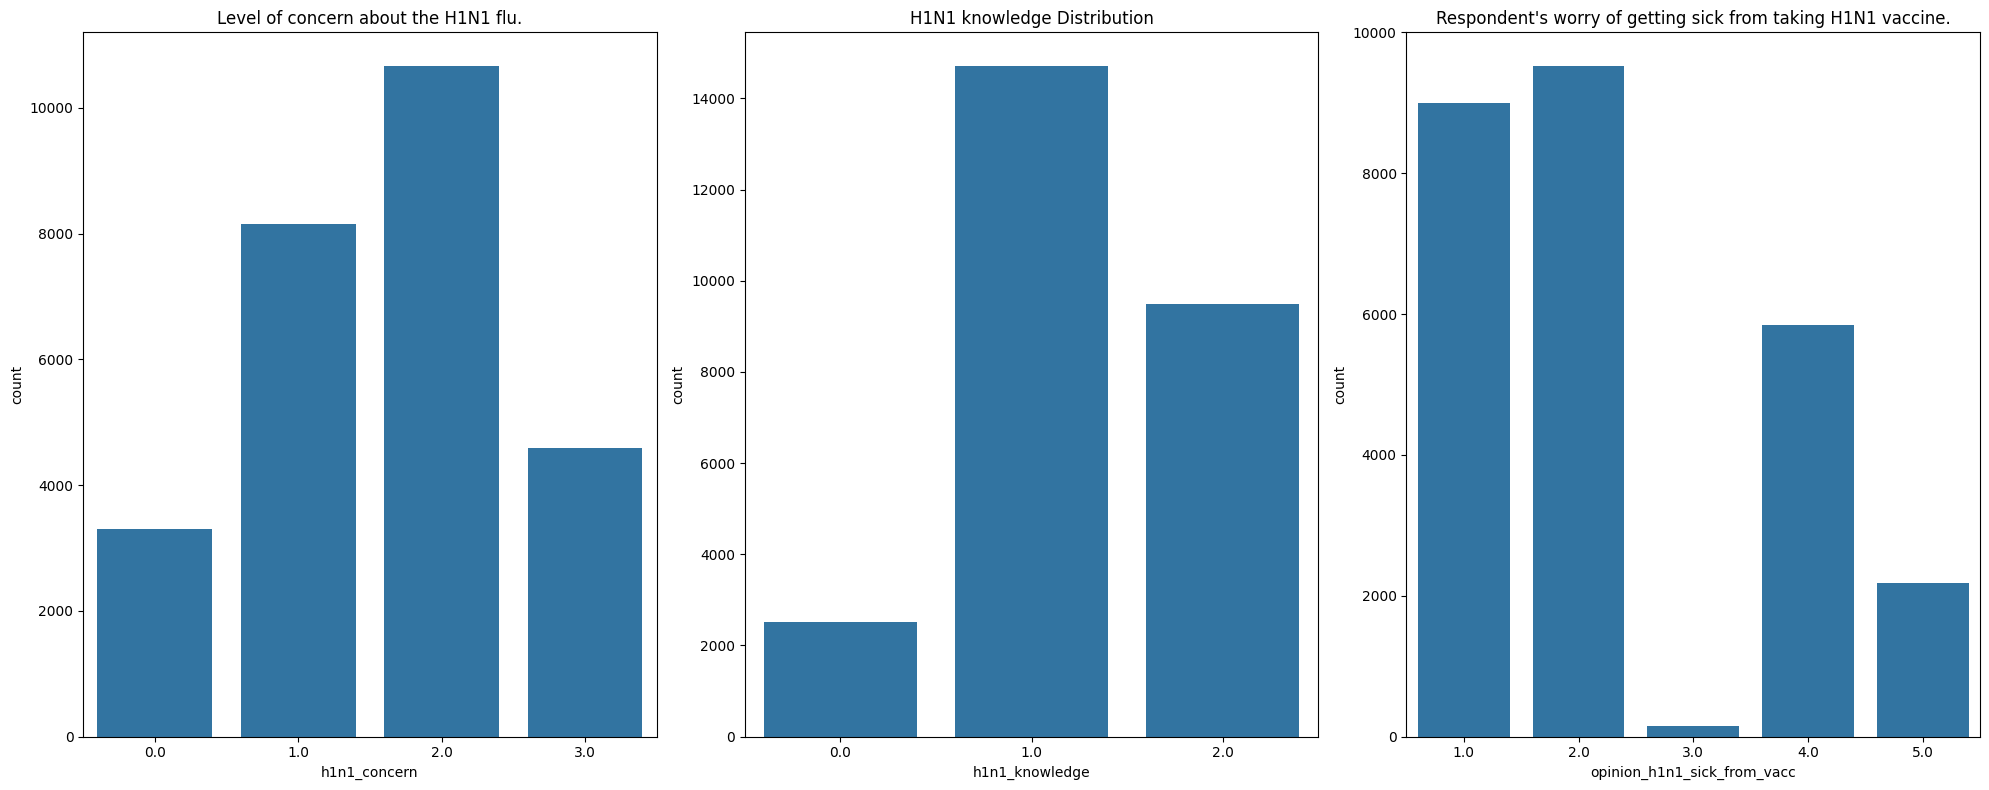

In [190]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# First plot: h1n1_concern
sns.countplot(x="h1n1_concern", data=df, ax=axes[0])
axes[0].set_title("Level of concern about the H1N1 flu.")

# Second plot: h1n1_vaccine
sns.countplot(x="h1n1_knowledge", data=df, ax=axes[1])
axes[1].set_title("H1N1 knowledge Distribution")

# Third plot: doctor_recc_h1n1
sns.countplot(x="opinion_h1n1_sick_from_vacc", data=df, ax=axes[2])
axes[2].set_title("Respondent's worry of getting sick from taking H1N1 vaccine.")

# Display the plots
plt.tight_layout()
plt.show()

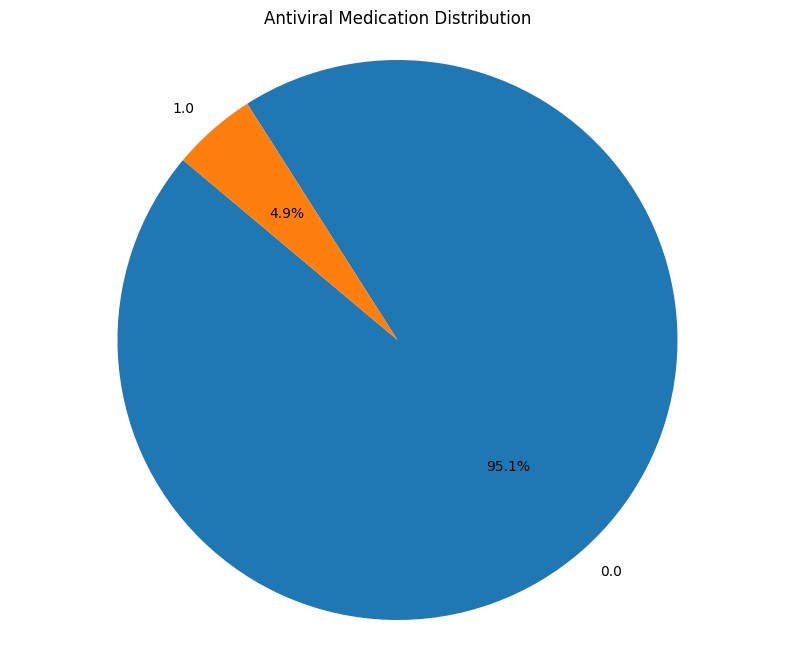

In [191]:
value_counts = df["behavioral_antiviral_meds"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Antiviral Medication Distribution')
plt.axis('equal')
plt.show()

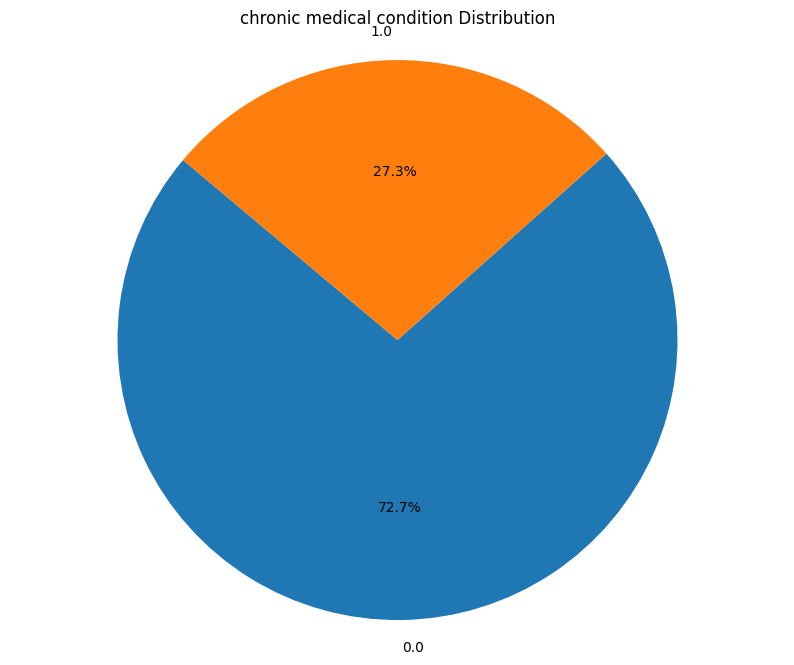

In [192]:
value_counts = df["chronic_med_condition"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('chronic medical condition Distribution')
plt.axis('equal')
plt.show()

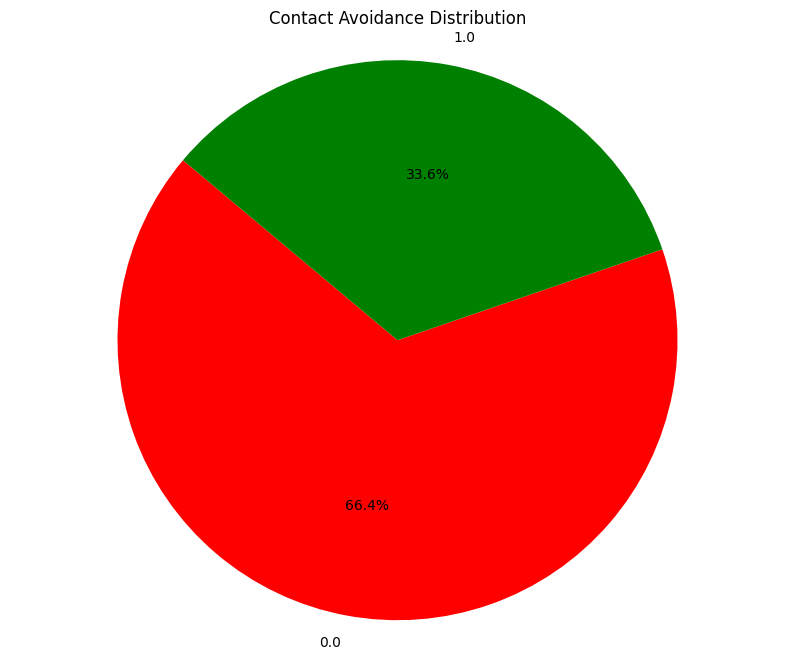

In [193]:
contact_avoidance_counts = df["behavioral_outside_home"].value_counts()

plt.figure(figsize=(10,8))
color=["red","green"]
plt.pie(contact_avoidance_counts, labels=contact_avoidance_counts.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.title('Contact Avoidance Distribution')
plt.axis('equal')
plt.show()

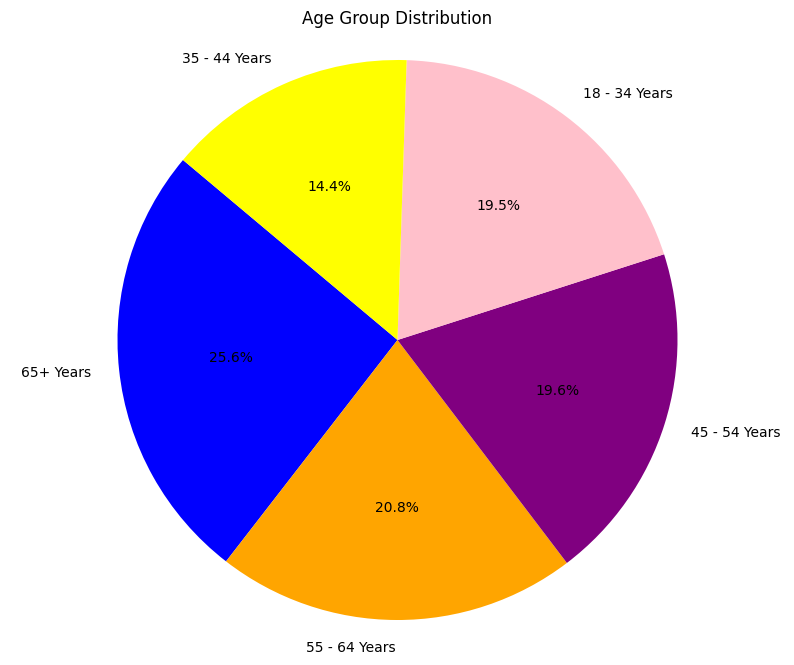

In [194]:
age_group_counts = df["age_group"].value_counts()

plt.figure(figsize=(10,8))
color=["blue","orange", 'purple', 'pink', 'yellow']
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

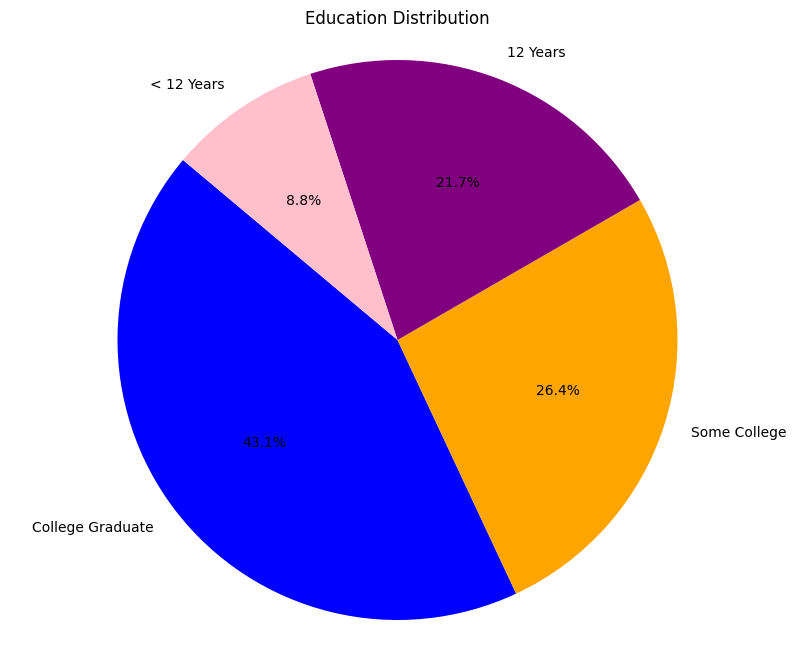

In [195]:
education = df["education"].value_counts()

plt.figure(figsize=(10,8))
color=["blue","orange", 'purple', 'pink', 'yellow']
plt.pie(education, labels=education.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.title('Education Distribution')
plt.axis('equal')
plt.show()

In [196]:
numerical_cols

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [197]:
categorical_cols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

# Data preprocessing
- Feature Engineering

In [198]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
encoder = LabelEncoder()
df_categorical = df.select_dtypes(include=['object'])
df_categorical_preprocessed = pd.DataFrame(df_categorical.apply(encoder.fit_transform))
df_categorical_preprocessed

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,3,1,3,0,2,1,0,1,8,2
1,1,0,3,1,2,1,1,0,1,0
2,0,2,3,1,0,1,0,0,9,0
3,4,0,3,0,2,1,1,1,5,1
4,2,3,3,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,9,2
26703,0,2,3,1,0,1,1,0,6,1
26704,3,3,3,0,0,1,0,0,6,0
26705,0,3,1,0,0,0,1,0,5,2


In [199]:
scaler = MinMaxScaler()
df_numerical = df.select_dtypes(include=['float', 'int'])
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)
df_numerical_scaled

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.50,0.00,0.25,0.25,0.00,0.25,0.000000,0.0,0.0,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.00,0.75,0.75,0.75,0.25,0.75,0.000000,0.0,0.0,1.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.00,0.00,0.75,0.00,0.25,0.666667,0.0,0.0,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.50,0.50,1.00,1.00,0.75,0.00,0.000000,0.0,0.0,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.50,0.50,0.25,0.50,0.00,0.75,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.00,0.00,1.00,0.25,0.25,0.000000,0.0,0.0,0.0
26703,0.999888,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.75,0.25,0.25,1.00,0.00,0.00,0.333333,0.0,0.0,0.0
26704,0.999925,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.75,0.75,0.25,1.00,0.75,0.25,0.000000,0.0,0.0,1.0
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.50,0.00,0.25,0.25,0.00,0.25,0.333333,0.0,0.0,0.0


In [200]:
df_numerical_scaled

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.50,0.00,0.25,0.25,0.00,0.25,0.000000,0.0,0.0,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.00,0.75,0.75,0.75,0.25,0.75,0.000000,0.0,0.0,1.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.00,0.00,0.75,0.00,0.25,0.666667,0.0,0.0,0.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.50,0.50,1.00,1.00,0.75,0.00,0.000000,0.0,0.0,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.50,0.50,0.25,0.50,0.00,0.75,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.50,0.00,0.00,1.00,0.25,0.25,0.000000,0.0,0.0,0.0
26703,0.999888,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.75,0.25,0.25,1.00,0.00,0.00,0.333333,0.0,0.0,0.0
26704,0.999925,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.75,0.75,0.25,1.00,0.75,0.25,0.000000,0.0,0.0,1.0
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.50,0.00,0.25,0.25,0.00,0.25,0.333333,0.0,0.0,0.0


In [201]:
df_new = pd.concat(
    [pd.DataFrame(df_categorical_preprocessed), pd.DataFrame(df_numerical_scaled)], axis=1
)

# Statistical Analysis
## Univariate analysis

<Axes: xlabel='h1n1_concern'>

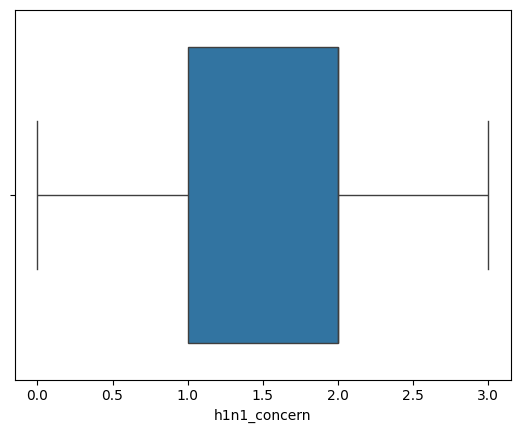

In [202]:
sns.boxplot(data=df, x='h1n1_concern')

<Axes: xlabel='opinion_h1n1_vacc_effective', ylabel='Count'>

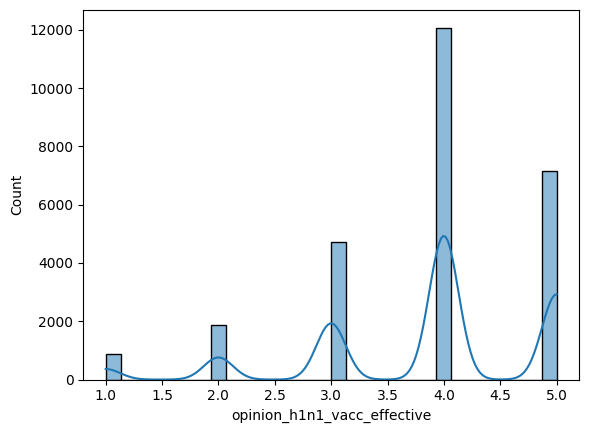

In [203]:
sns.histplot(data=df, x='opinion_h1n1_vacc_effective', kde=True)

<Axes: xlabel='opinion_seas_vacc_effective', ylabel='Count'>

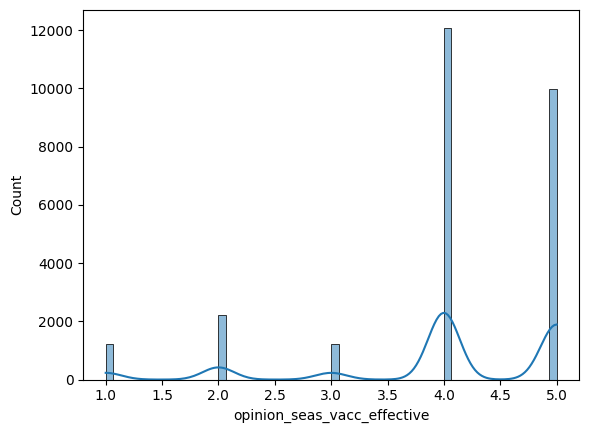

In [204]:
sns.histplot(data=df, x='opinion_seas_vacc_effective', kde=True)

# Bivariate analysis

<Axes: xlabel='h1n1_concern', ylabel='age_group'>

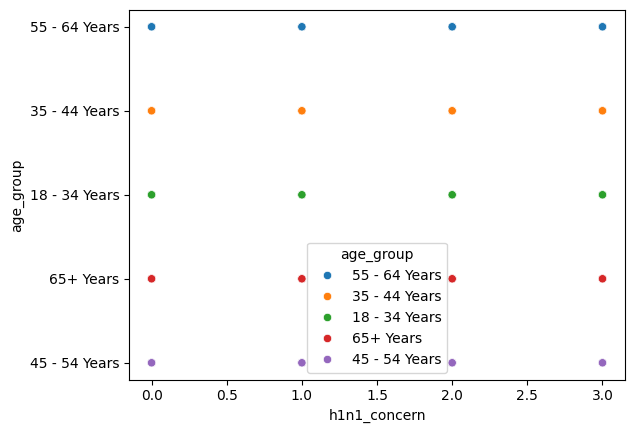

In [205]:
sns.scatterplot(data=df, x= 'h1n1_concern',y='age_group', hue='age_group')

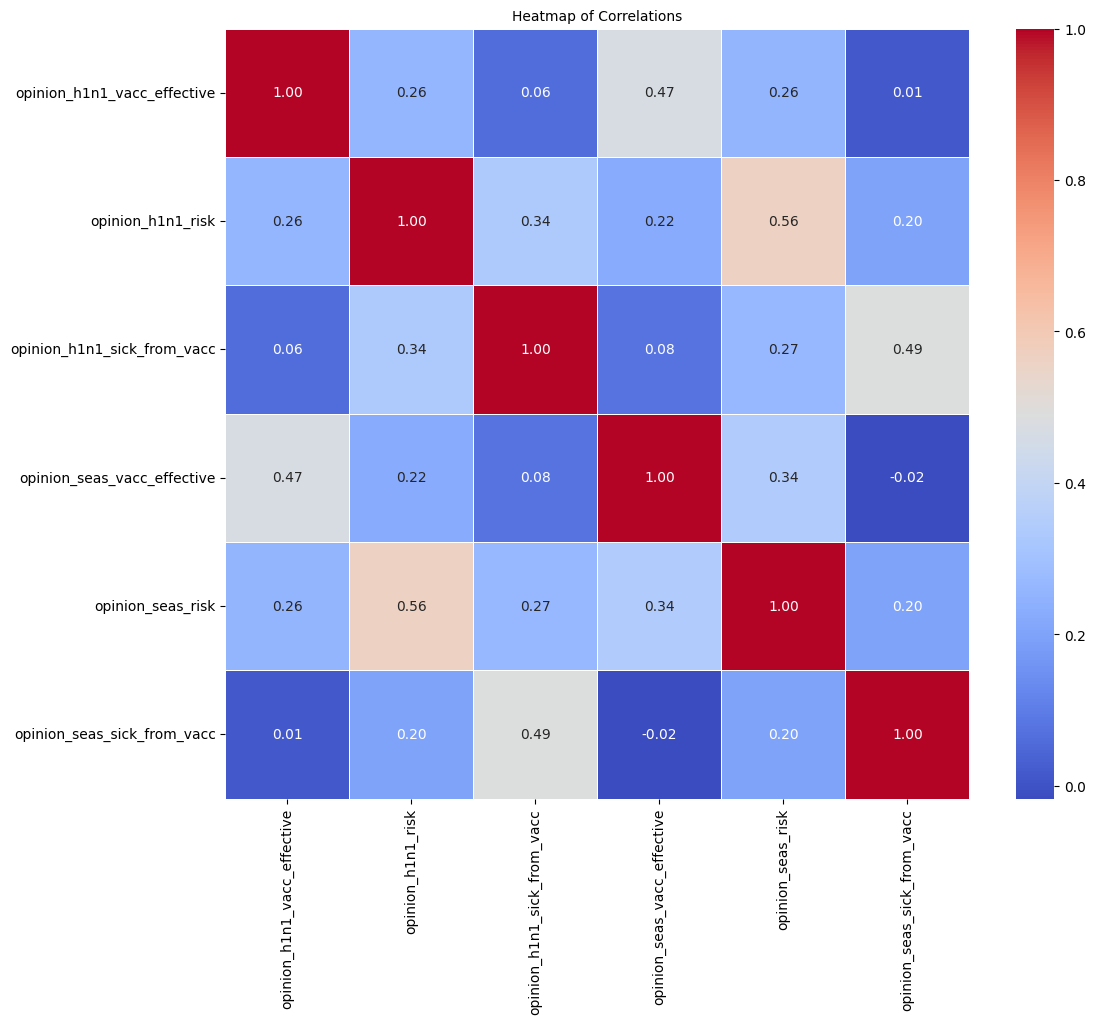

In [206]:
# data
opinion_response = df[
                    ['opinion_h1n1_vacc_effective',
                      'opinion_h1n1_risk',
                      'opinion_h1n1_sick_from_vacc',
                      'opinion_seas_vacc_effective',
                      'opinion_seas_risk',
                      'opinion_seas_sick_from_vacc']
]

# Create a DataFrame
opinion_response = pd.DataFrame(opinion_response)

# Compute the correlation matrix
correlation_matrix = opinion_response.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
# Add titles and labels
plt.title('Heatmap of Correlations', fontsize=10)
plt.show()


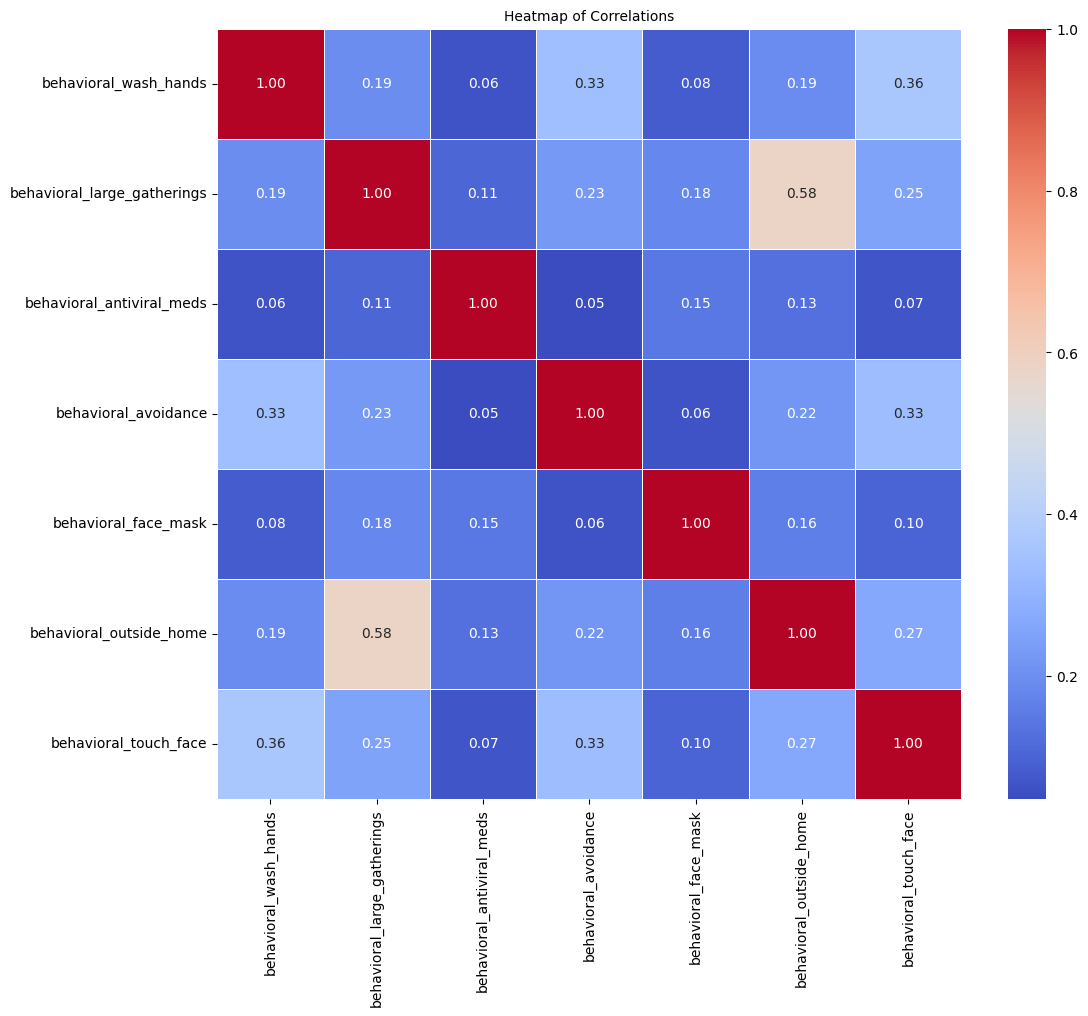

In [207]:
# data
behavior_response = df[
                    ['behavioral_wash_hands',
                      'behavioral_large_gatherings',
                      'behavioral_antiviral_meds',
                      'behavioral_avoidance',
                      'behavioral_face_mask',
                      'behavioral_outside_home',
                      'behavioral_touch_face']
]

# Create a DataFrame
behavior_response = pd.DataFrame(behavior_response)

# Compute the correlation matrix
correlation_matrix = behavior_response.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add titles and labels
# Add titles and labels
plt.title('Heatmap of Correlations', fontsize=10)
plt.show()


# Predictive Statistics
## Modeling
- Basleine model
- Refined model
- Evaluation
- Adress class imbalance

In [210]:
# Model creation
X=df_new.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)
y=df_new[['h1n1_vaccine','seasonal_vaccine']]

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation and insights
- Report metrics
- Analyze feature importance
- Interpretation


# Recommendations
- Suggestions
- Limitations

# Implementations